In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2, random_state=15)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error

print("R2Score:", r2_score(y_test, y_pred))
print("MSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2Score: 0.44724978084532585
MSE: 57.162988238217004


In [24]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=0.0001)
r.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [25]:
y_pred1 = r.predict(X_test)
print("R2Score:", r2_score(y_test, y_pred1))
print("MSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))

R2Score: 0.44724382459290835
MSE: 57.16329622205661


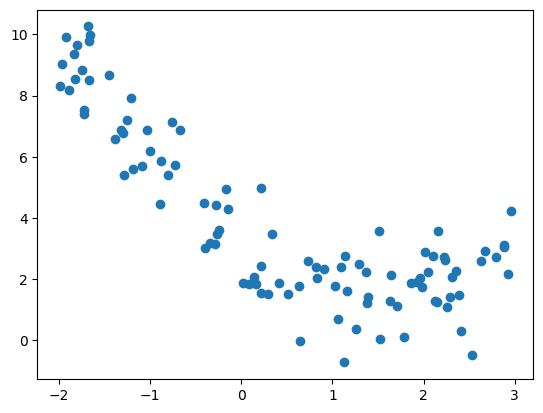

In [28]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1**2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

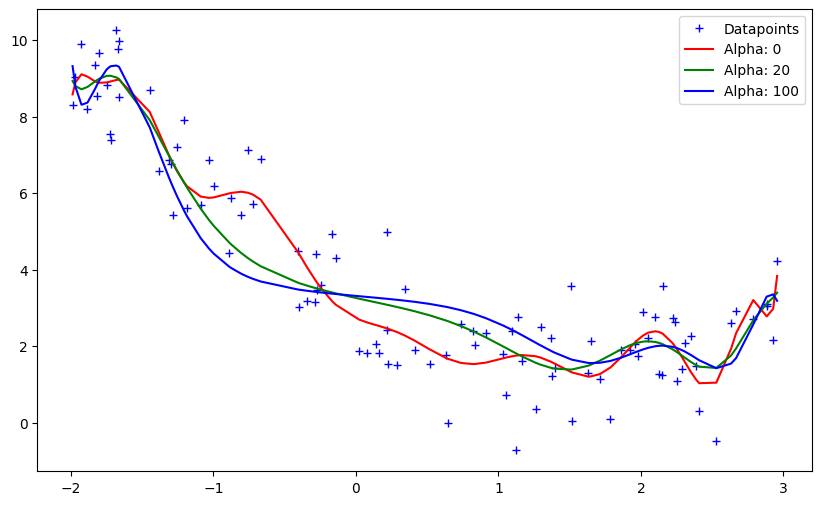

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def get_preds_ridge(x1, x2, alpha):
    model = Pipeline(
        [("poly_feats", PolynomialFeatures(degree=16)), ("ridge", Ridge(alpha=alpha))]
    )
    model.fit(x1, x2)
    return model.predict(x1)


alphas = [0, 20, 100]
cs = ["r", "g", "b"]

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, "b+", label="Datapoints")

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(
        sorted(x1[:, 0]),
        preds[np.argsort(x1[:, 0])],
        c,
        label="Alpha: {}".format(alpha),
    )

plt.legend()
plt.show()